In [22]:
pip show qiskit

Name: qiskit
Version: 2.1.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /Users/supalertee/Projects/venv-main/lib/python3.12/site-packages
Requires: dill, numpy, rustworkx, scipy, stevedore, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-machine-learning
Note: you may need to restart the kernel to use updated packages.


# Basic Quantum Information and Qubit Control from Scratch with Qiskit

This note is written to study quantum information and quantum machine learning from scratch. Its main purpose is to bridge quantum mechanics and quantum computation by utilizing the Qiskit package.

## Introduction
As a theoretical physicist, I am well-versed in paper-based calculations in quantum mechanics and quantum many-body systems. However, communicating these concepts to those outside the field can be quite challenging, especially when it comes to explaining what each notation represents. Recently, I discovered that quantum computing frameworks such as Qiskit and PennyLane offer an effective way to explore and visualize quantum mechanics quantitatively. These tools provide an intuitive bridge between abstract formalism and concrete computational understanding.

# Basic Notations for Quantum Information.
To move further, we first need to understand the basic notation used in quantum mechanics. In this field, quantum states are typically represented in Dirac notation as $\ket{\psi}$. This symbol denotes a vector in a Hilbert space, which you can think of as a vector in a complex vector space:

$$
\ket{\psi} = \begin{pmatrix} \psi_0 \\ \psi_1\\ \vdots \\ \psi_n \end{pmatrix}
$$

However, in quantum information, we primarily address qubits, which are quantum states defined in a two-dimensional Hilbert space. So in this context, the state vector simplifies to
$$
\ket{\psi} = \begin{pmatrix} \psi_0 \\ \psi_1 \end{pmatrix}
$$

Because the qubit lives in a complex vector space, both components are generally complex numbers. That is: 

$$\psi_0,\psi_1 \in \mathbb{C}$$

These components must also satisfy a normalization condition. So, each component, such as $\psi_0$, can be a complex number, typically written in the form:

$$ \psi_0 = a + bi \quad \text{where}\quad a,b \in \mathbb{R}$$
For qubits, these values are often constrained such that $a,b \in [-1,1]$ although the exact range depends on the normalization condition:

$$|\psi_0|^2 + |\psi_1|^2 = 1$$

Geometrically, all valid qubit states lie on the surface of a unit sphere in complex two-dimensional space, known as the **Bloch sphere**.


### Qubits

First, let’s think about the word bit. In classical computing, a bit is the smallest unit of information, and it can only be in one of two states: 0 or 1. You can imagine it like a light switch, either on or off, or like a magnet pointing up or down. Using arrays of bits, we can represent any kind of data.

However, in quantum computing, we have quantum bits, or qubits. A qubit is fundamentally different because it’s based on quantum mechanics. It’s not limited to just 0 or 1. It can exist in a combination of both at the same time. We call this a superposition. 

## Why did this happen!?

This is because qubit states are defined in a complex vector space (called a Hilbert space), rather than in real-valued space. This isn’t just a mathematical abstraction; it's supported by experimental evidence, such as the behavior of electron spin or photon polarization, which inherently obeys quantum mechanics in complex space.

# Visualization of Bloch Sphere and State Vectors

Instead of just simple states 0 or 1 ($\ket{0}$,$\ket{1}$) a qubit can exist in any linear combination of these two states. This means the state vector 
$\ket{\psi} = a\ket{0} + b\ket{1}$ represents a point on the surface of the Bloch sphere, a unit sphere derived from the geometry of the 2-dimensional complex Hilbert space.
Here, 
$$\ket{0} = \begin{pmatrix}1 \\ 0\end{pmatrix}$$
$$\ket{1} = \begin{pmatrix}0 \\ 1\end{pmatrix}$$

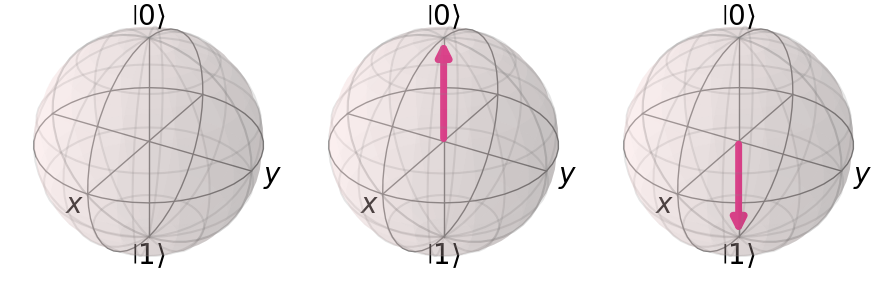

In [3]:
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
import numpy as np

ket_0 = [0, 0, 1]   # |0⟩
ket_1 = [0, 0, -1]  # |1⟩

fig = plt.figure(figsize=(9, 3))
axes = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]

# Empty
b0 = Bloch(axes=axes[0])
b0.title = "Empty"
b0.render()

# |0⟩
b1 = Bloch(axes=axes[1])
b1.add_vectors(ket_0)
b1.render()

# |1⟩
b2 = Bloch(axes=axes[2])
b2.add_vectors(ket_1)
b2.render()

plt.tight_layout()
plt.show()


Now, as I told you, those vectors can point any direction on the Bloch sphere, so we will define the bases of these vectors. We have done $\ket{0}$ and $\ket{1}$; you can imagine they are something like classical bits. Now, since a vector in this space could be a combination of $\ket{0}$ and $\ket{1}$:

$$\ket{\psi} = a\ket{0} + b\ket{1} $$

where $a,b \in \mathbb{C}$, so we will see that when they point to the $x, -x, y, -y$ direction, I could be written as follows:

$$
\begin{aligned}
\ket{+x} &= \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\\
\ket{-x} &= \frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\\
\ket{y} &= \frac{1}{\sqrt{2}}(\ket{0}+i\ket{1})\\
\ket{-y} &= \frac{1}{\sqrt{2}}(\ket{0}-i\ket{1})\\
\end{aligned}
$$

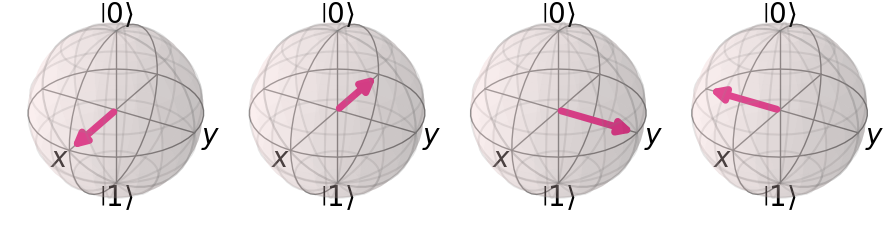

In [4]:
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
import numpy as np

ket_xp = [1, 0, 0]   # |+x⟩
ket_xm = [-1, 0, 0]  # |-x⟩
ket_yp = [0, 1, 0]   # |+y⟩
ket_ym = [0, -1, 0]  # |-y⟩

fig = plt.figure(figsize=(9, 4))
axes = [fig.add_subplot(1, 4, i+1, projection='3d') for i in range(4)]

# |+x⟩
b1 = Bloch(axes=axes[0])
b1.add_vectors(ket_xp)
b1.render()

# |-x⟩
b2 = Bloch(axes=axes[1])
b2.add_vectors(ket_xm)
b2.render()

# |+y⟩
b3 = Bloch(axes=axes[2])
b3.add_vectors(ket_yp)
b3.render()

# |-y⟩
b4 = Bloch(axes=axes[3])
b4.add_vectors(ket_ym)
b4.render()

plt.tight_layout()
plt.show()


Since any qubit state can be expressed as a linear combination of $\ket{0}$ and $\ket{1}$, the set { $\ket{0}$ , $\ket{1}$} forms a complete basis for the 2D Hilbert space. Therefore, all vectors (i.e., states) on the Bloch sphere can be written using just these two basis states.

# How can we control the state of a qubit mathematically?

Now, let's say we have an original state from an electron's spin.
$$\ket{0} = \begin{pmatrix}1 \\ 0\end{pmatrix}$$
$$\ket{1} = \begin{pmatrix}0 \\ 1\end{pmatrix}$$

How can we manipulate a state into $ \ket{-x} $? The answer is quite simple in practice: we just need to apply an **operator**, which in this case is a matrix $ H $, to transform the state accordingly.
However, in the context of quantum mechanics, not just any matrix is allowed. In a Hilbert space, the operator $ H $ must satisfy a specific condition; it must be a **Unitary Operator**, meaning:
$$
H^{\dagger} \equiv (H^{*})^{T} = H^{-1}
$$

I will not go deep into the mathematical background but will assume that a set of 2x2 (since we are considering a 2-level system for now), which will always reproduce the **Unitary Operator**, is Pauli matrices: 

$$
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix},\quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$
and do not forget the identity matrix. 

$$
I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$

Now, we can see that 
$$
\begin{aligned}
\frac{1}{\sqrt{2}}(\sigma_x+\sigma_z)\ket{0} &= \frac{1}{\sqrt{2}}(\sigma_x+\sigma_z)\begin{pmatrix}1 \\0 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\Big[\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}+\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\Big]\begin{pmatrix}1 \\0 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}1 \\0 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}1\cdot 1 + 0\cdot 1 \\ 1\cdot 1 + 0 \cdot -1 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1 \end{pmatrix}\\
&\equiv \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})
\end{aligned}
$$

This resulting state is the superposition state $\ket{+x}$, which lies along the +x direction of the Bloch sphere. The operator we just used is known as the Hadamard matrix:

$$
\begin{aligned}
H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
\end{aligned}
$$

you can also see that 
$$
H^{\dagger} = \frac{1}{\sqrt{2}} \begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}^{\dagger} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
$$

## Other important matrices

Of course, you can also construct operators that rotate the states $\ket{0}$ and $\ket{1}$ to any arbitrary point on the surface of the Bloch sphere. These operators are typically expressed as unitary matrices, often parameterized using rotation gates such as $R_x(\theta),R_y(\theta)$, and $R_z(\theta)$, which represent rotations about the x, y, and z axes, respectively.

$$ 
\begin{aligned}
I &= \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\quad \text{(Does nothing)}\\
\sigma_x &= \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\quad \text{Flips } \ket{0} \leftrightarrow \ket{1}\\

\sigma_y &= \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\quad \text{(Flip + phase)}\\

\sigma_z &= \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\quad \text{Adds phase } \pi \text{ to } \ket{1}\\

\textbf{Hadamard (H):} \quad
H &= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\quad \text{(Superposition / X-Z basis switch)}\\

\textbf{Phase Gate (S):} \quad
S &= \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\quad \text{Phase shift } \pi/2 \text{ to } \ket{1}\\

\textbf{T Gate:} \quad
T &= \begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
\quad \text{Phase shift } \pi/4 \text{ to } \ket{1}\\

R_x(\theta) &= [\cos\left(\frac{\theta}{2}\right) I - i\sin\left(\frac{\theta}{2}\right)] \sigma_x \\
R_y(\theta) &= [\cos\left(\frac{\theta}{2}\right) I - i\sin\left(\frac{\theta}{2}\right)] \sigma_y \\
R_z(\theta) &= [\cos\left(\frac{\theta}{2}\right) I - i\sin\left(\frac{\theta}{2}\right)] \sigma_z\\
\end{aligned}
$$

All of them can be written in a general form **General Single-Qubit Unitary** (U3)
$$
\begin{aligned}
U_3(\theta, \phi, \lambda) &= 
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i\phi} \sin\left(\frac{\theta}{2}\right) & e^{i(\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
\end{aligned}
$$

# Pauli Matrices and Vector States Visualization

Let's first consider a computational state that is transformed by Pauli matrices operators.

$$ 
\begin{aligned}
I &= \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\quad \text{(Does nothing)}\\
\sigma_x &= \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\quad \text{Flips } \ket{0} \leftrightarrow \ket{1}\\

\sigma_y &= \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\quad \text{(Flip + phase)}\\

\sigma_z &= \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\quad \text{Adds phase } \pi \text{ to } \ket{1}\\
\end{aligned}
$$


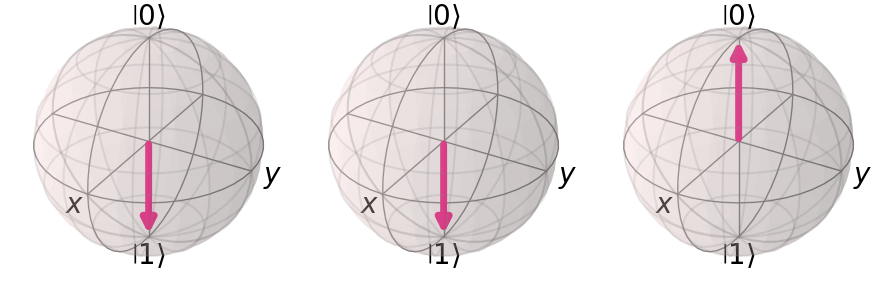

Vector for pauli_x|0⟩: [0 1]
Vector for pauli_y|0⟩: [0.+0.j 0.+1.j]
Vector for pauli_z|0⟩: [1 0]


In [5]:
import numpy as np
from qiskit.quantum_info import Statevector


ket_0 = np.array([[1], [0]])

def state_to_bloch(state):
    # Convert a 2-element complex state vector to Bloch vector
    alpha = state[0]
    beta = state[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])



sigma_x = np.array([[0, 1],
                    [1, 0]])

sigma_y = np.array([[0, -1j],
                    [1j, 0]])

sigma_z = np.array([[1, 0],
                    [0, -1]])

                    
ket0_pauli_x = sigma_x @ ket_0
ket0_pauli_y = sigma_y @ ket_0
ket0_pauli_z = sigma_z @ ket_0

bloch_x = state_to_bloch(ket0_pauli_x).flatten()
bloch_y = state_to_bloch(ket0_pauli_y).flatten()
bloch_z = state_to_bloch(ket0_pauli_z).flatten()

fig = plt.figure(figsize=(9, 3))
axes = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]

# pauli_x ket 0
b1 = Bloch(axes=axes[0])
b1.add_vectors(bloch_x)
b1.render()

# pauli_y ket 0
b2 = Bloch(axes=axes[1])
b2.add_vectors(bloch_y)
b2.render()

# pauli_z ket 0
b3 = Bloch(axes=axes[2])
b3.add_vectors(bloch_z)
b3.render()

plt.tight_layout()
plt.show()

print("Vector for pauli_x|0⟩:", f'{ket0_pauli_x.flatten()}')
print("Vector for pauli_y|0⟩:", f'{ket0_pauli_y.flatten()}')
print("Vector for pauli_z|0⟩:", f'{ket0_pauli_z.flatten()}')


# Hadamard Matrix and Vector States Visualization

Let's first consider a computational state that is transformed by Hadamard operators.$$ 
\begin{aligned}
H &= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\quad \text{(Superposition / X-Z basis switch)}\\
\end{aligned}
$$

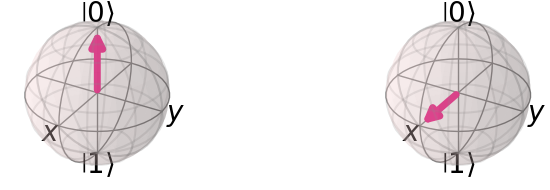

Vector for |0⟩: [1 0]
Vector for H|0⟩: [0.70710678 0.70710678]


In [6]:
import numpy as np
from qiskit.quantum_info import Statevector

def state_to_bloch(state):
    # Convert a 2-element complex state vector to Bloch vector
    alpha = state[0]
    beta = state[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])


ket_0 = np.array([[1], [0]]) # |0⟩
bloch_ket0 = state_to_bloch(ket_0).flatten()  # |0⟩ for visualization in Bloch sphere


H = (1/np.sqrt(2)) * np.array([[1, 1],
                    [1, -1]]) # Hadamard Matrix

ket0_H = H @ ket_0 # Apply Hadamard to |0⟩
bloch_H = state_to_bloch(ket0_H).flatten()  # |+⟩ for visualization in Bloch sphere


fig = plt.figure(figsize=(9, 2))
axes = [fig.add_subplot(1, 2, i+1, projection='3d') for i in range(2)]

# ket 0
b1 = Bloch(axes=axes[0])
b1.add_vectors(bloch_ket0)
b1.render()

# Hadamard ket 0
b2 = Bloch(axes=axes[1])
b2.add_vectors(bloch_H)
b2.render()

plt.tight_layout()
plt.show()

print("Vector for |0⟩:", f'{ket_0.flatten()}')
print("Vector for H|0⟩:", f'{ket0_H.flatten()}')


# Phase Matrix and Vector States Visualization

Let's first consider a computational state that is transformed by phase operators S and T.

$$ 
\begin{aligned}
S &= \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\quad \text{Phase shift } \pi/2 \text{ to } \ket{1}\\

T &= \begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
\quad \text{Phase shift } \pi/4 \text{ to } \ket{1}\\
\end{aligned}
$$

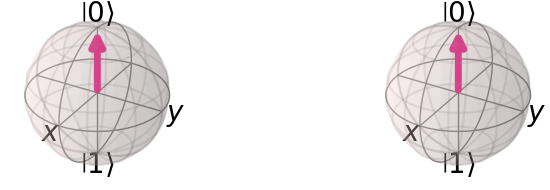

Vector for |0⟩: [1 0]
Vector for S|0⟩: [1.+0.j 0.+0.j]
Vector for T|0⟩: [1.+0.j 0.+0.j]


In [20]:
import numpy as np
from qiskit.quantum_info import Statevector

def state_to_bloch(state):
    # Convert a 2-element complex state vector to Bloch vector
    alpha = state[0]
    beta = state[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])


ket_0 = np.array([[1], [0]]) # |0⟩
bloch_ket0 = state_to_bloch(ket_0).flatten()  # |0⟩ for visualization in Bloch sphere


S = np.array([[1, 0],
            [0, 1j]]) # S Matrix
T =  np.array([[1, 0],
            [0, np.exp(1j * np.pi / 4)]]) # T Matrix

ket0_S = S @ ket_0 # Apply S to |0⟩
bloch_S = state_to_bloch(ket0_S).flatten()  # S|+⟩ for visualization in Bloch sphere

ket0_T = T @ ket_0 # Apply T to |0⟩
bloch_T = state_to_bloch(ket0_T).flatten()  # T|+⟩ for visualization in Bloch sphere


fig = plt.figure(figsize=(9, 2))
axes = [fig.add_subplot(1, 2, i+1, projection='3d') for i in range(2)]

# ket 0
b1 = Bloch(axes=axes[0])
b1.add_vectors(bloch_S)
b1.render()

# Hadamard ket 0
b2 = Bloch(axes=axes[1])
b2.add_vectors(bloch_T)
b2.render()

plt.tight_layout()
plt.show()

print("Vector for |0⟩:", f'{ket_0.flatten()}')
print("Vector for S|0⟩:", f'{ket0_S.flatten()}')
print("Vector for T|0⟩:", f'{ket0_T.flatten()}')


## Why do S and T not change $\ket{0}$?

Because they rotate the qubit around the Z-axis, and $\ket{0}$ lies exactly on the Z-axis. So when you rotate around that same axis, nothing visibly changes; the vector is just **spinning around** its own line.

## How to visualize them then?
Let’s start by transforming the state $\ket{0}$ into a superposition. One of the simplest superposition states is $\ket{+x}$, which can be created by applying the Hadamard operator.

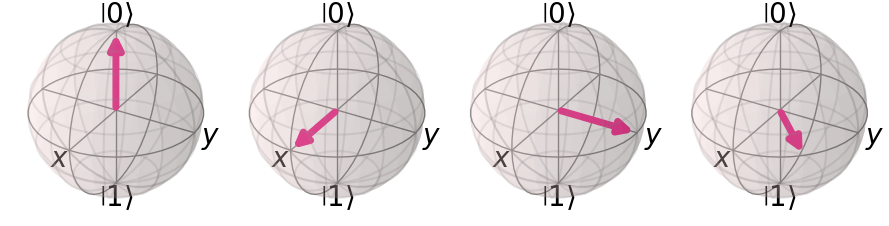

Vector for |0⟩: [1 0]
Vector for H|0⟩: [0.71 0.71]
Vector for S|0⟩: [0.71+0.j   0.  +0.71j]
Vector for T|0⟩: [0.71+0.j  0.5 +0.5j]


In [5]:
import numpy as np
from qiskit.quantum_info import Statevector

def state_to_bloch(state):
    # Convert a 2-element complex state vector to Bloch vector
    alpha = state[0]
    beta = state[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])


ket_0 = np.array([[1], [0]]) # |0⟩
H = (1/np.sqrt(2)) * np.array([[1, 1],
                    [1, -1]]) # Hadamard Matrix

ket0_H = H @ ket_0 # Apply Hadamard to |0⟩

bloch_ket0 = state_to_bloch(ket_0).flatten()  # |0⟩ for visualization in Bloch sphere
bloch_H = state_to_bloch(ket0_H).flatten()  # H|0⟩ for visualization in Bloch sphere

S = np.array([[1, 0],
            [0, 1j]]) # S Matrix
T =  np.array([[1, 0],
            [0, np.exp(1j * np.pi / 4)]]) # T Matrix

ket0_S = S @ ket0_H # Apply S to |0⟩
bloch_S = state_to_bloch(ket0_S).flatten()  # S|+⟩ for visualization in Bloch sphere

ket0_T = T @ ket0_H # Apply T to |0⟩
bloch_T = state_to_bloch(ket0_T).flatten()  # T|+⟩ for visualization in Bloch sphere


fig = plt.figure(figsize=(9, 4))
axes = [fig.add_subplot(1, 4, i+1, projection='3d') for i in range(4)]

# ket 0
b1 = Bloch(axes=axes[0])
b1.add_vectors(bloch_ket0)
b1.render()

# Hadamard ket 0
b2 = Bloch(axes=axes[1])
b2.add_vectors(bloch_H)
b2.render()

# S ket 0
b3 = Bloch(axes=axes[2])
b3.add_vectors(bloch_S)
b3.render() 

# T ket 0
b4 = Bloch(axes=axes[3])
b4.add_vectors(bloch_T)
b4.render()

plt.tight_layout()
plt.show()

print("Vector for |0⟩:", f'{np.round(ket_0,2).flatten()}')
print("Vector for H|0⟩:", f'{np.round(ket0_H,2).flatten()}')
print("Vector for S|0⟩:", f'{np.round(ket0_S,2).flatten()}')
print("Vector for T|0⟩:", f'{np.round(ket0_T,2).flatten()}')


#### Perfect! Now, our $\ket{+x}$ is rotated by T and S by $\pi/2$ and $\pi/4$, respectively, as we claimed.

## General Single-Qubit Unitary Operator Visualization

As shown previously, qubit states can be rotated around the Bloch sphere using various quantum gates, many of which can be expressed as combinations of Pauli matrices. But can we generalize all possible single-qubit rotations into a single form?

The answer is yes, and this generalized form is called the single-qubit unitary operator, denoted as $U_3(\theta, \phi, \lambda)$

$$
\begin{aligned}
U_3(\theta, \phi, \lambda) &= 
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i\phi} \sin\left(\frac{\theta}{2}\right) & e^{i(\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
\end{aligned}
$$
where 
$\theta$ represents how far you tilt down from the pole (like latitude). The sum 
$\phi+\lambda$ is direction you're pointing on the equator (longitude)


Together, these parameters allow us to point the qubit’s state to any location on the Bloch sphere.

### Randomized Demonstration
To demonstrate this idea, I will randomly generate values for $\theta,\phi, \lambda$ and construct the corresponding unitary $U_3$, and apply it to the basis state $\ket{0}$. The result will be a new qubit state somewhere on the surface of the Bloch sphere, a concrete example of how this operator fully parameterizes qubit space.

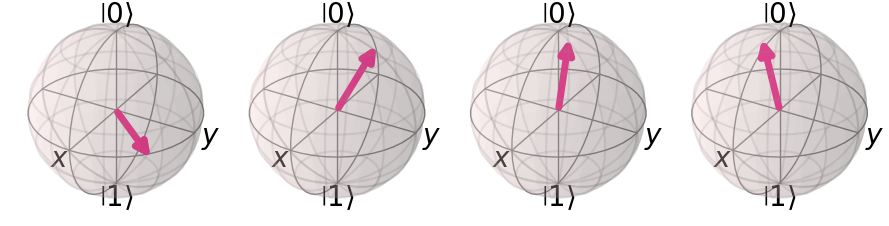

Vector for U31|0⟩: [ 0.27+0.j   -0.85+0.45j]
Vector for U32|0⟩: [ 0.86+0.j   -0.51+0.03j]
Vector for U33|0⟩: [-0.88+0.j    0.45+0.17j]
Vector for U34|0⟩: [-0.99+0.j   -0.08+0.07j]


In [6]:
import numpy as np
from qiskit.quantum_info import Statevector

def state_to_bloch(state):
    # Convert a 2-element complex state vector to Bloch vector
    alpha = state[0]
    beta = state[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])

def U3(lamb, theta, phi):
    # U3 gate matrix
    return np.array([[np.cos(theta/2), -np.exp(1j * phi) * np.sin(theta/2)],
                     [np.exp(1j * lamb) * np.sin(theta/2), np.exp(1j * (lamb + phi)) * np.cos(theta/2)]])

ket_0 = np.array([[1], [0]]) # |0⟩
bloch_ket0 = state_to_bloch(ket_0).flatten()  # |0⟩ for visualization in Bloch sphere


ket0_U31 = U3(np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi)) @ ket_0 # Apply U3 to |0⟩
ket0_U32 = U3(np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi)) @ ket_0 # Apply U3 to |0⟩
ket0_U33 = U3(np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi)) @ ket_0 # Apply U3 to |0⟩
ket0_U34=  U3(np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi),np.random.uniform(0, 2*np.pi)) @ ket_0 # Apply U3 to |0⟩
bloch_U31 = state_to_bloch(ket0_U31).flatten()  # U31|+⟩ for visualization in Bloch sphere
bloch_U32 = state_to_bloch(ket0_U32).flatten()  # U32|+⟩ for visualization in Bloch sphere
bloch_U33 = state_to_bloch(ket0_U33).flatten()  # U33|+⟩ for visualization in Bloch sphere
bloch_U34 = state_to_bloch(ket0_U34).flatten()  # U34|+⟩ for visualization in Bloch sphere


fig = plt.figure(figsize=(9, 4))
axes = [fig.add_subplot(1, 4, i+1, projection='3d') for i in range(4)]

# U31|0⟩
b1 = Bloch(axes=axes[0])
b1.add_vectors(bloch_U31)
b1.render()

# U32|0⟩
b2 = Bloch(axes=axes[1])
b2.add_vectors(bloch_U32)
b2.render()

# U33|0⟩
b3 = Bloch(axes=axes[2])
b3.add_vectors(bloch_U33)
b3.render() 

# U34|0⟩
b4 = Bloch(axes=axes[3])
b4.add_vectors(bloch_U34)
b4.render()

plt.tight_layout()
plt.show()

print("Vector for U31|0⟩:", f'{np.round(ket0_U31,2).flatten()}')
print("Vector for U32|0⟩:", f'{np.round(ket0_U32,2).flatten()}')
print("Vector for U33|0⟩:", f'{np.round(ket0_U33,2).flatten()}')
print("Vector for U34|0⟩:", f'{np.round(ket0_U34,2).flatten()}')


# Quantum Circuits

Now that we’ve covered the mathematical foundations, you might be wondering:
<br>
 "If we eventually build stable qubits, how do we actually control them in practice using these mathematical operations?"
</br>
   
The good news is "yes, we can!"

And that's exactly why we have quantum computing ecosystems like Qiskit and PennyLane.

These frameworks provide high-level APIs that allow us to simulate quantum systems on classical machines or even run our circuits on real quantum hardware provided by IBM, IonQ, Rigetti, and others.

Just like in classical computing, where mathematical operations are translated into electronic circuits, in quantum computing, we translate those quantum operations into quantum circuits, logical diagrams that represent how qubits evolve over time using gates like Hadamard, CNOT, and phase gates.

In this note, we will focus on IBM Qiskit only.

### Preparing a Bare Qubit

In order to write a qubit in Qiskit, which is very simple, I will create a quantum circuit that has only bare qubits and will visualize its vector in the Bloch sphere.

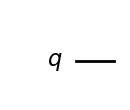

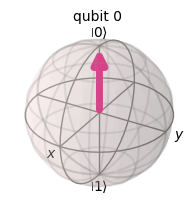

|0⟩: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

# Create quantum circuit
qc = QuantumCircuit(1)
ket0 = Statevector.from_instruction(qc)

bloch_fig = plot_bloch_multivector(ket0)
bloch_fig.set_size_inches(2, 2)  # width and height

display(qc.draw('mpl'), bloch_fig)
print("|0⟩:", f'{ket0}')

### Hadamard Gate and Vector State
Now, let’s repeat the same procedure as before, but instead of explicitly defining the Hadamard matrix mathematically, we’ll simply use the Hadamard gate provided by Qiskit. This gate internally applies the correct transformation, allowing us to manipulate the qubit state without manually specifying the full matrix.

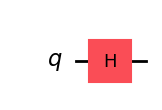

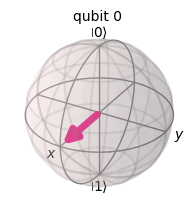

|0⟩: [0.71+0.j 0.71+0.j]


In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from IPython.display import display

# Create quantum circuit
qc = QuantumCircuit(1)
qc.h(0)
ket0 = Statevector.from_instruction(qc)

bloch_fig = plot_bloch_multivector(ket0)
bloch_fig.set_size_inches(2, 2)  # width and height

display(qc.draw('mpl'), bloch_fig)
print("|0⟩:", f'{np.round(ket0,2)}')

So, as you can see, Qiskit simplifies complex mathematical operations into intuitive quantum circuits. Each circuit visually represents the mathematical expressions behind it and stores the corresponding quantum operations.
Furthermore, Qiskit allows you to apply quantum gates like the Hadamard operator effortlessly, enabling you to manipulate qubits with just a few lines of code.

### Hadamard Gate, S Gate, and Vector State

As we demonstrated mathematically by transforming the state $\ket{0}$ into $\ket{+}$ using the Hadamard operator and then applying the **S gate** (a phase rotation), we can now replicate the same sequence directly using a quantum circuit.

Instead of handling the matrices manually, we simply apply the **Hadamard gate followed by the S gate** in sequence to the qubit:
$$
\ket{\psi} = S \cdot H \cdot \ket{0}
$$
This operation rotates the qubit from the north pole of the Bloch sphere to the positive X-axis $ \ket{+}$, and then adds a $ \frac{\pi}{2} $ phase to the $ \ket{1} $ component via the S gate, effectively rotating the vector toward the Y-axis.

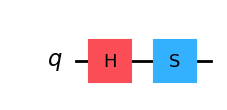

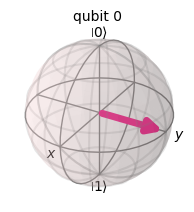

|0⟩: [0.71+0.j   0.  +0.71j]


In [18]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

from IPython.display import display

# Create quantum circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
ket0 = Statevector.from_instruction(qc)

bloch_fig = plot_bloch_multivector(ket0)
bloch_fig.set_size_inches(2, 2)  # width and height

display(qc.draw('mpl'), bloch_fig)
print("|0⟩:", f'{np.round(ket0,2)}')

### Single-Qubit Unitary Gate (U gate)

As similar as the general single-qubit unitary operator, Qiskit also has a U gate, which you can put a parameter $\theta,\phi,\lambda$ into.

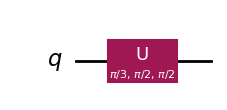

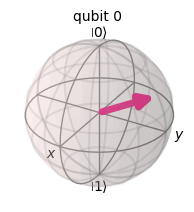

|0⟩: [0.87+0.j  0.  +0.5j]


In [17]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

# Create quantum circuit
qc = QuantumCircuit(1)
theta = np.pi / 3
phi = np.pi / 2
lam = np.pi/2

qc.u(theta, phi, lam, 0)

ket0 = Statevector.from_instruction(qc)
bloch_fig = plot_bloch_multivector(ket0)
bloch_fig.set_size_inches(2, 2)  # width and height

display(qc.draw('mpl'), bloch_fig)
print("|0⟩:", f'{np.round(ket0,2)}')

### Measurement (Quantum information to Classical information)

Now, you might wonder:

We've been doing everything on the Bloch sphere, so how do we relate this to classical bits?

As mentioned earlier, a classical bit can be seen as a special case of a qubit, specifically, when the qubit is in state $\ket{0}$ and $\ket{1}$. To extract classical information from a qubit, we perform a measurement.

In quantum mechanics, measurement is a process that projects the quantum state $\ket{\phi}$ onto a basis, usually the computational basis.

The result of this projection gives us a classical bit  either 0 or 1  with probabilities determined by the amplitudes of $\ket{\psi}$

Simply speaking, measurement collapses a quantum state into a classical value!

|0⟩: [0.87+0.j  0.  +0.5j]


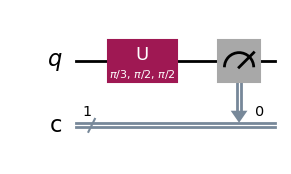

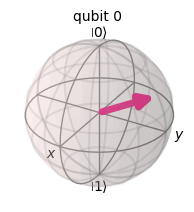

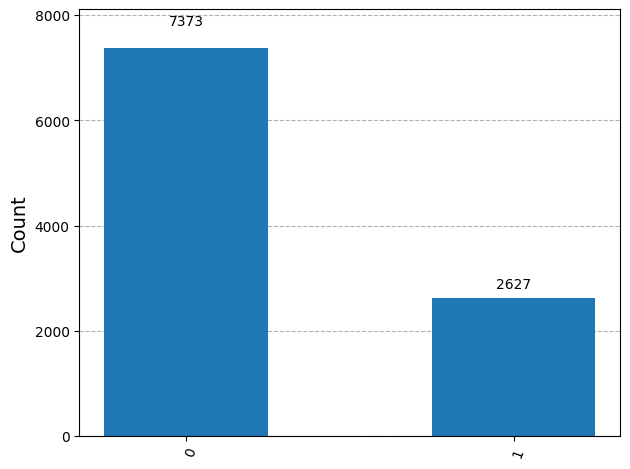

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
import numpy as np
from IPython.display import display

# Create quantum circuit
qc = QuantumCircuit(1,1)
theta = np.pi / 3
phi = np.pi / 2
lam = np.pi/2

qc.u(theta, phi, lam, 0)
ket0 = Statevector.from_instruction(qc)

print("|0⟩:", f'{np.round(ket0,2)}')

# Get the statevector before measurement
bloch_fig = plot_bloch_multivector(ket0)
bloch_fig.set_size_inches(2, 2)

# Start measure the quantum states
qc.measure(0,0)
backend = Aer.get_backend("qasm_simulator")
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=10000)
result = job.result()

# Get result
counts = result.get_counts()
display(qc.draw('mpl'), bloch_fig,plot_histogram(counts))


# Plot

## What is going on here?

To understand quantum measurement, let’s recall some basics of quantum mechanics.

Suppose we apply the general single-qubit gate  $U(\pi/3,\pi/2,\pi/2)$ gate, the calculation gives us, 
$$\ket{\Psi} = U(\pi/3,\pi/2,\pi/2)\ket{0}= \begin{pmatrix}0.87\\ 0.5i\end{pmatrix}$$

So, what we did in quantum mechanics is measure it by projecting into $\ket{0}$ or $\ket{1}$. Thus, mathematically,
measuring by $\ket{0}$, we get 
$$
\begin{aligned}
\bra{\Psi}P_0\ket{\Psi} &= \braket{\Psi|0}\braket{0|\Psi}\\
&= \begin{pmatrix}0.87 & -0.5i\end{pmatrix} \begin{pmatrix}1\\ 0\end{pmatrix}\begin{pmatrix}1 & 0\end{pmatrix} \begin{pmatrix}0.87\\ 0.5i\end{pmatrix}\\
&= (0.87)(0.87)\\
&= 0.7569
\end{aligned}
$$

and measuring by $\ket{1}$, we get 

$$
\begin{aligned}
\bra{\Psi}P_1\ket{\Psi} &= \braket{\Psi|1}\braket{1|\Psi}\\
&= \begin{pmatrix}0.87 & -0.5i\end{pmatrix} \begin{pmatrix}0\\ 1\end{pmatrix}\begin{pmatrix}0 & 1\end{pmatrix} \begin{pmatrix}0.87\\ 0.5i\end{pmatrix}\\
&= (-0.5i)(0.5i)\\
&= -(-0.25)\\
&= 0.25
\end{aligned}
$$

So, what you are doing when you measure is projecting a quantum state onto the computational basis vectors, and the outcome you observe corresponds to those projections.

$$P(\ket{0})+P(\ket{1}) \approx 1$$

# Now that we’ve finished exploring single-qubit control and basic quantum operations

We are ready to move on to multi-qubit systems. In the next section, we will introduce the concept of entanglement: one of the most fundamental and powerful ideas in quantum information theory.

Entanglement is not only essential for understanding the behavior of multi-qubit systems, but it also plays a key role in what gives quantum computing its extraordinary potential.